# Hardness
The purpose of this study is to shed some light on the concept of learning hardness.
The starting point are some preliminary observations; from these observations we formulate a first simple model treatable analitically.

## Conjectures from observations
[preliminary observations](http://localhost:8890/notebooks/Inter-classes_angles.ipynb) seems to suggest that:
* the hardness of a specific class is highly connected to the other ones involved in the classification problem (The "hard class" of the first experiment become the "easy" in the second, with a substitution of one of the classes involved in the learning problem)


## Hypothesis 
We start tackling the problem with a theoretical analysis on a simple model. The study is fixed from the following assumptions; some of them are reasonable hypothesis others are just useful to approach the problem with a first analisys and can be relaxed in a second time with a more deep analisys.

The assumption used for the model construction are the following:
* **2 classes are considered** : this is not a necessary hypothesys, we can easly extend the analisys to more classes. On the other hand we expect that the learning contribution of the hardness of a given classes wil be given by the more similar class among the whole group.
* we are using the nodes of the last layer before the output as representation of the sample (and accordingly of the classes); we assume that the distribution of **the class representation is, in good approximation, a multivariate gaussian**
* **the variance is equal in all direction in the space of representation** : this is an assumtion to simplify the calculus (in this way is easy to recognise samples that cause the hardness: samples that cross boundary classifier surface will be concentrated in the direction of the axe that connect the two gaussian centres)
* **Linear discriminant analysis hypothesis**: the correlation matrix, which fix distribution's shape, is equal for each class. This "mirror hypothesis" is not a necessary hypothesis, but semplify calculus. In this way boundary sourfaces are linear (hyper-planes).
* The norm of various representation is not so different; this hypothesys is connected 


In [7]:
%%latex
We consider a gaussian blobs as representation for each class (to deepen LDA see chapter 4 of "Kevin P. Murphy - Machine Learning A Probabilistic Perspective")
Our purpose is to find a suitable measure for the hardness of the classes. Intuititively a class will be 
hard to classify if it is similar to another one beacous some of its element will be mixed with a conseguence wrong classification.
we can start from this to define a measure for the hardness as the fraction of sample belonging to the class wrongly associated by the
machine to a different one (following this reasoning actually we can also define an hardness due to one specific class as the fraction of wrong classification from our class that flows 
                           into one specific class)
Now to express the idea of the calculus we start from a 1-D model. In this case our representation space is a line and the division boundary is a point.
More in detail, for the simmetry of our model, the boundary will be the poin in the mean between the 2 centres of the gaussian blobs (distribution of the 2 classes samples).
To fix the notation, we call the 2 classes $A$ and $B$; $\xi_i \in A \sim  \mathcal{N}(\mu_a, \sigma_a) $ while $\xi_i \in B \sim  \mathcal{N}(\mu_b, \sigma_b) $,
with $\sigma_a = \sigma_b$. If I want to count the number of element (over the $A$ sample with size $N_A$) wrong classified I should compute:
    \begin{equation}
        C\int_{\frac{\mu_a + \mu_b}{2}}^{\infty} dx' e^{\frac{-(x' -\mu_a)^2}{2 \sigma_a^2}} = C\int_t^{\infty} dx' e^{-\frac{x'^2}{2 \sigma_a^2}}
    \end{equation}
with $t = \frac{\mu_b -\mu_a}{2}$; $C$ is the normalization constant. There are two way to solve the integral; the first one gives us a slowly converging series.
The second one provide a non converging, but asymptotic serie. To follows this second approach, we start integrating by part:
    \begin{equation}
        C\int_t^{\infty} dx' e^{-\frac{x'^2}{2 \sigma_a^2}} = C\frac{\sigma_a^2}{t}e^{-\frac{x'^2}{2 \sigma_a^2}} - C\int_t^{\infty} dx'\frac{\sigma_a^2}{x'^2} e^{-\frac{x'^2}{2 \sigma_a^2}} =
                                                                                      C\frac{\sigma_a^2}{t}e^{-\frac{x'^2}{2 \sigma_a^2}} - C\int_t^{\infty} dx'^2 \frac{\sigma_a^2}{2 (x'^2)^{\frac{3}{2}}} e^{-\frac{x'^2}{2 \sigma_a^2}}

    \end{equation}
    
    Iterating the same approach we obtain the following expansion:
    \begin{equation}
   C\int_t^{\infty} dx' e^{-\frac{x'^2}{2 \sigma_a^2}} = C e^{-t^2} \sum_{n=0}^{M-1} (-\sigma_a^2)^n (2n-1)!! \frac{1}{t^{2n+1}} + R_M(x)
   \end{equation}

<IPython.core.display.Latex object>


## A more practical starting point
Following the previous way we can characterize the hardness of the model integrating an asymptotic serie which represent an estimate on the probability density to find a point belonging to a class after the division surface boundary (so to classify it in a wrong way).
We can choose another, more practical approach to quantify the hardness of the classification.
Again our analisys will start from LDA analysis; (for more details about it, see for example chapter 4 of [this book](https://books.google.ch/books?hl=en&lr=&id=RC43AgAAQBAJ&oi=fnd&pg=PR7&dq=murphy+machine+learning+a+probabilistic+perspective&ots=umhD8ARw5b&sig=o_rMZj5XJdyCEi6YgEpU0XuiAg8&redir_esc=y#v=onepage&q=murphy%20machine%20learning%20a%20probabilistic%20perspective&f=false) )



In [8]:
%%latex
We can reformulate a generic classification problem in these terms: given a sample $\vec{x}$ and a set of possible classes
    we can estimate the one $\vec{x}$ belongs to as the class $c$ that maximize $P(y=c | \vec{x}, \vec{\theta})$.
    Using Bayes we can express the previous probability as:
        \begin{equation}
            P(y=c | \vec{x}, \vec{\theta}) = \frac{P(y=c | \vec{x}) P(\vec{x} | y=c , \vec{\theta}) }{ \sum_{c'} P(y=c' | \vec{x}) P(\vec{x} | y=c' , \vec{\theta}) }
        \end{equation}
Now consider the case of gaussian dataset, or, in other words $P(\vec{x} | y=c , \vec{\theta}) \sim  \mathcal{N}(\vec{x} | \mu_c, \Sigma_c)$
                                                                                                                                     

If we add the hypothesis that $ \Sigma_c = \Sigma \forall c$, substituting the gaussian form into $P(y=c | \vec{x}, \vec{\theta})$
, it's easy to see that the quadratic term at exponent (which is independent from the class index) simplify with 
cthe corresponding in the denominator. So, in this simplify case, in which I assumed an equal correlation matrix
for all the classes, we have a linear form at exponent; this means that the probability function as the form of a 
logistic function whoose division surface has a linear profile (line or, in general, an hyperplane).
If we focus on a two classes problem I will have$\big( \text{defining } \beta_c = \Sigma^{-1} \mu_c$, $\gamma_c = -\frac{1}{2} \mu_c^T \Sigma^{-1} \mu_c + \log(P(y=c|\theta))  \big)$, consider a 2-class problem:
\begin{equation}                                                                                                                                         
        P(y=1|\vec{x} , \vec{\theta}) = \frac{e^{\vec{\beta_1}^T \vec{x} + \gamma_1}}{e^{\vec{\beta_1}^T \vec{x} + \gamma_1} + e^{\vec{\beta_0}^T \vec{x} + \gamma_0}} = \frac{1}{1 +  e^{(\vec{\beta_0}-\vec{\beta_1})^T \vec{x} + (\gamma_0-\gamma_1)}}
\end{equation}     
So in the last side we have a sigmoid function; the magnitude of the vector $(\vec{\beta_0}-\vec{\beta_1})$ determines the stepness 
of the function; so we can use it to parametrize the hardness of the division bettween the 2 classes. In fact the more 
the 2 classes are devided, the more boundary surface will be steepest.                                                                                                                                      

<IPython.core.display.Latex object>

### A numerical implementation (linear network)
Consider the neural network with the following architecture: just an input layer connected to an output one, without intermediate hidden layer. This modelization represent the last layer of a generic network architecture; fixing the input dataset in this optic is equivalent to congelate the last layer representation (block the dynamic) and wait the termalization of the last weight set. If in a generic (or meaningful) part of our dynamic the gaussian hypothesis for this representation is valid then our analysis is meaningful also in that more complex scenario. But for now forget it about this generalization reasoning and focus on the simple linear case.
If we use as loss function the cross entropy between the real output distribution and the predicted one, using a soft-max activation function on the output layer (Boltzmann-like) we are using a form for the estimated probability distribution equal to the one used in the LDA analysis. Since this analysis start from the real theoretical probability distribution, and since during the learning dynamic we are basically reducing the distance between the empirical probability distribution and the empirical one, if the samples follow the distribution at the hypothesis of LDA analisys, in the limit of dataset size going to infinity the parameters infered by the learning should converge to the one of LDA. Plus, in every cases in which the similarity between 2 classes (1,2) is greater than the one between 1 and a second generic class we can still use the equation of the last block (formally valid for the 2 class problem), since the other terms in the denominators will be neglectable.


#### Verify consistence between linear network and LDA
Consider a classification problem with 2 classes involved; we have an estimation of the asymptotic value of the weights connecting input-output layers (from LDA) we calculate at each step the norm of the distance between this vector and the real one to see if it goes to 0 for t going to infinity



#### Measure of hardness in multi-classification problem
We consider a 3-class case (2 similar, 1 distant) and observe if there is consistence between the hardness estimated from weight and distribution parameters

## More advanced misclassified measures

### Fisher approach
Fisher approaches the 2-class problem in a different way; Fisher’s idea was to transform the multivariate observa-
tions to univariate observations y such that the y’s derived from different population were separated as much as possible. HE suggested taking linear combinations
of observations to create y’s because they are simple enough functions of the x to be handled
easily. Fisher’s approach does not assume that the populations are normal. It does,
however, implicitly assume that the population covariance matrices are equal, be-
cause a pooled estimate of the common covariance matrix is used.

The separation of these two sets of univariate
y’s is assessed in terms of the difference between the 2 corresponding mean values, expressed in standard
deviation units (for more details see, for example, [this](https://statistics.columbian.gwu.edu/sites/g/files/zaxdzs1911/f/downloads/Syllabus%20Stat%206215.11%20Fall%202014%20Hu.pdf))

In [9]:
%%latex
separation $= \frac{|\overline{y}_1 - \overline{y}_2|}{\sigma_y}$, with $\sigma_y = \frac{\sum_{j=1}^{n_1} (y_{j1} - \overline{y}_1 )^2 + \sum_{j=1}^{n_2} (y_{j2} - \overline{y}_2 )^2 }{n_1 + n_2 -2}$
The objective is to select the linear combina-
tion of the x to achieve maximum separation of the sample means $\overline{y}_1$ and $\overline{y}_2$.
Using Cauchy–Schwarz inequality, we can proof that $\hat{y} = \vec{a}^T \vec{x} = (\vec{x}_1 - \vec{x}_2)^T \Sigma_{pooled}^{-1} \vec{x} $ maximizes the ratio $\frac{(\overline{y}_1 - \overline{y}_2)^2}{\sigma_y^2}$

<IPython.core.display.Latex object>

Basically in Fisher's approach all
points in the scatter plots are projected onto a line in the direction a N , and this direc-
tion is varied until the samples are maximally separated. 
Provided that the two normal populations have the same covariance ma-
trix, Fisher’s classification rule is equivalent to the minimum ECM rule with equal
prior probabilities and equal costs of misclassification. ECM rule with equal costs of misclassification is the same result of LDA discussed previously.
The huge advantage gained from Fisher's approach is that we project a generic multidimensional problem transforming it into a mono dimensional one; this simplify for example the calculus of the misclassified samples

### Evaluating Classification Functions
One important way of judging the performance of any classification procedure is to
calculate its “error rates,” or misclassification probabilities. 

In [14]:
%%latex 
we deal with 2 univariate normal distributed random variable with : $\mu_{y_1} = \vec{a}^T \vec{x} = (\vec{\mu}_1 -\vec{\mu}_2)^T \Sigma^{-1} \vec{\mu}_1 $, $\mu_{y_2} = \vec{a}^T \vec{x} = (\vec{\mu}_1 -\vec{\mu}_2)^T \Sigma^{-1} \vec{\mu}_2$ and $\sigma_y^2 = \vec{a}^T \Sigma^{-1} \vec{a} = (\vec{\mu}_1 -\vec{\mu}_2)^T \Sigma^{-1} (\vec{\mu}_1 -\vec{\mu}_2) \equiv \Delta^2 $
If we define now $P(1 \rightarrow 2)$ the probability to misclassify a sample belonging to class $1$ as a membre of class $2$ (so that it corresponding y is
after the one corrisponding to the division boundary), we have that:
\begin{equation}
    P(1 \rightarrow 2) = P \bigg(y < (\vec{\mu}_1 -\vec{\mu}_2)^T \Sigma^{-1} \frac{(\vec{\mu}_1 + \vec{\mu}_2)}{2}\bigg) = P \bigg(\frac{y-\mu_{y_1}}{\sigma_y} < \frac{(\vec{\mu}_1 -\vec{\mu}_2)^T \Sigma^{-1} \frac{(\vec{\mu}_1 + \vec{\mu}_2)}{2} - (\vec{\mu}_1 -\vec{\mu}_2)^T \Sigma^{-1} \vec{\mu}_1 }{\Delta} \bigg) = P \bigg( Z < \frac{\frac{\Delta^2}{2}}{\Delta} \bigg) = \Phi \bigg(\frac{-\Delta}{2} \bigg)
\end{equation}
In the same way
\begin{equation}
    P(2 \rightarrow 1) = P \bigg(y \geq (\vec{\mu}_1 -\vec{\mu}_2)^T \Sigma^{-1} \frac{(\vec{\mu}_1 + \vec{\mu}_2)}{2}\bigg) =  P \bigg( Z \geq \frac{\frac{\Delta^2}{2}}{\Delta} \bigg) = 1- \Phi \bigg(\frac{\Delta}{2} \bigg) = \Phi \bigg(\frac{-\Delta}{2} \bigg)
\end{equation}
Therefore, the optimum error rate is (the two contribution are weighted with $\frac{1}{2}$ because the prior is equal for the 2 classes):
\begin{equation}
    OER = \frac{1}{2} P(1 \rightarrow 2) + \frac{1}{2} P(2 \rightarrow 1) =  \Phi \bigg(\frac{-\Delta}{2} \bigg)
\end{equation}

We can calculate the gaussian definite integral numericaly but we can also use the error function asymptotic expansion to
obtain an expression in terms of the problem's parameters.
IN particular we can proceed
\begin{equation}
    \int_t^{\infty} dx' e^{-x'^2} = \frac{1}{\sqrt{\pi}t}e^{-t^2} - \int_t^{\infty} dx'\frac{1}{x'^2} e^{-x'^2} =
                                                                                      \frac{1}{\sqrt{\pi}t}e^{-t^2} - \int_t^{\infty} dx'^2 \frac{1}{(x'^2)^{\frac{3}{2}}} e^{-x'^2} 
\end{equation}
Iterating the same procedure (integrating by parts) we obtain a series expansion
\begin{equation}
    \int_t^{\infty} dx' e^{-x'^2} = \frac{1}{\sqrt{\pi}}e^{-t^2} \sum_{n=0}^{N-1} \frac{(-1)^n (|2n-1|)!!}{(2)^n} \frac{1}{t^{2n+1}} + R_N(t)
\end{equation}

where the $R_N(t)$ is the remainder; it's easy to see that this series is not convergent (we can find a convergent series for this integral proceeding in a different way); 
besides the serie is asymptotic, in fact:
\begin{equation}
    |R_N(t)| = C_N|\int_{t^2}^{\infty} ds s^{\frac{-1}{2}-n}e^{-s}| \leq C_N\int_{t^2}^{\infty} ds |s^{\frac{-1}{2}-N}|e^{-s} = C_N\int_{t^2}^{\infty} ds s^{\frac{-1}{2}-N} e^{-s} = C_N \frac{e^{-t^2}}{t^{2N+1}} - C_{N+1}  \int_{t^2}^{\infty} ds s^{\frac{-1}{2}-N+1}e^{-s} \leq C_N \frac{e^{-t^2}}{t^{2N+1}}
\end{equation}
So the modulus of the reminder is lower than the first term that we neglet; the series is so asymptotic. Furtermore we can use the first neglected term as an upper bound of the uncertainty. 

<IPython.core.display.Latex object>

## Numerical simulation
We will use the previous result on a numerical simulation; in particular we consider 2 2-dimensional gaussian blobs.
### Note
We choose bidimensional gaussian blobs because we want to avoid errors on the accuracy estimation (performed throught the previous asymtotic expansion) due to a weak sampling of the distribution's tails: for this reason we start considering blobs not too distant (in this way the area that gives leading contribution of the misclassification is well sampled and the empirical distribution well reproduce the theoretical one); for the same reason we considered low dimensional blobs (to reduce dispersion over angular area).

### Logistic Steepness measure
We start comparing as a first estimation for the hardness the steepness of the logistic function, measured throught the norm of the vector introduced before. We can estimate this vector from the distribution parameters or from the networks parameters; so this is also useful to check the network converge to the optimal solution


In [11]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

(2, 101)


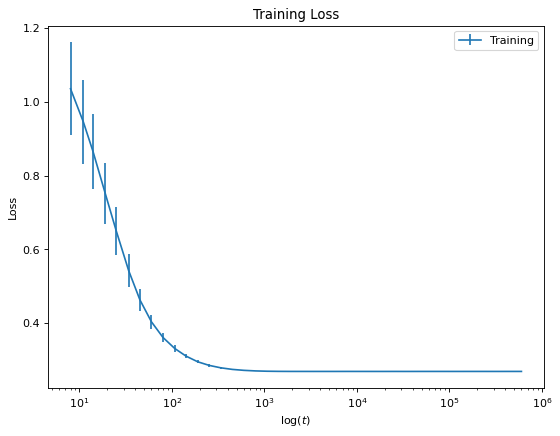

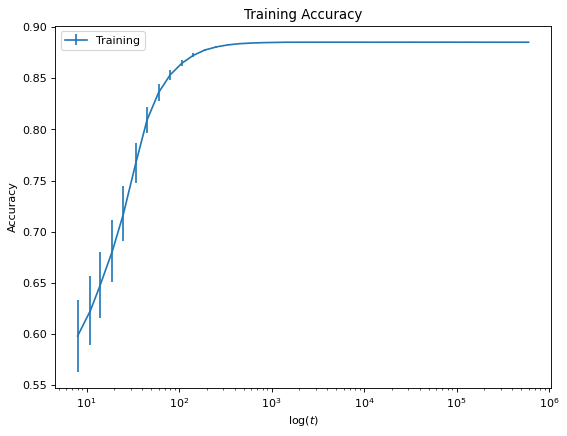

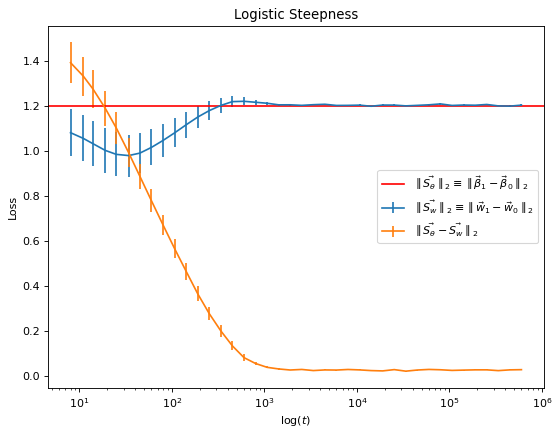

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import os





ParentFolder = './SimulationResult/StepnessAccuracyEstimate/2DNearBlobs'

#this fuction search recoursively inside the folder=parent the files with name= FileName, open them and append the variables inside Var (whIch is the object returned)
def FileFinder(parent, FileName, Var):
    for child in os.listdir(parent):
        if child == FileName:
            Vartemp = np.loadtxt( "".join((parent, "/", child)) , delimiter = ',')
            Var.append(Vartemp)
            #cosa fa
        else:
            current_path = "".join((parent, "/", child))
            if os.path.isdir(current_path):
                # if we're checking a sub-directory, recursively call this method
                FileFinder(current_path, FileName, Var)            
    return Var

Time = []
Diff = []
SteepNorm = []
TestLoss = []
TrainingLoss = []
TrainingAcc = []

DistrPar = []
ClassesLoss = []

num_classes = 2
n_epochs = 100

Time = FileFinder(ParentFolder, 'time.txt', Time)
#print(Time)
#print(len(Time))
Time = np.mean(Time, axis=0)


Diff = FileFinder(ParentFolder, 'DiffSteepnessNorm.txt', Diff)
StdDiff = np.divide(np.nanstd(Diff, axis=0), np.sqrt(np.sum(~np.isnan(Diff), axis = 0)))
MeanDiff = np.nanmean(Diff, axis = 0)

SteepNorm = FileFinder(ParentFolder, 'SteepnessNorm.txt', SteepNorm)
StdSteepNorm = np.divide(np.nanstd(SteepNorm, axis=0), np.sqrt(np.sum(~np.isnan(SteepNorm), axis = 0)))
MeanSteepNorm = np.nanmean(SteepNorm, axis = 0)


TrainingLoss = FileFinder(ParentFolder, 'TrainingLoss.txt', TrainingLoss)
StdTrainingLoss = np.divide(np.nanstd(TrainingLoss, axis=0), np.sqrt(np.sum(~np.isnan(TrainingLoss), axis = 0)))
MeanTrainingLoss = np.nanmean(TrainingLoss, axis = 0)                         
                          
TrainingAcc = FileFinder(ParentFolder, 'TrainAcc.txt', TrainingAcc)
TrainingAcc = [x /100. for x in TrainingAcc]
StdTrainingAcc = np.divide(np.nanstd(TrainingAcc, axis=0), np.sqrt(np.sum(~np.isnan(TrainingAcc), axis = 0)))
MeanTrainingAcc = np.nanmean(TrainingAcc, axis = 0)

DistrPar = FileFinder(ParentFolder, 'DeltaSq_Inaccuracy_UncertUpperBond.txt', DistrPar)
DistrPar = np.nanmean(DistrPar, axis = 0)


ClassesLoss = FileFinder(ParentFolder, 'TrainClassesLoss.txt', ClassesLoss)
ClassesLoss = [x /100000. for x in ClassesLoss]
StdClassesLoss = np.divide(np.nanstd(ClassesLoss, axis=0), np.sqrt(np.sum(~np.isnan(ClassesLoss), axis = 0)))
MeanClassesLoss = np.nanmean(ClassesLoss, axis = 0)
print(MeanClassesLoss.shape)


plt.figure(figsize=(8, 6), dpi=80)
plt.title("Training Loss")
#plt.errorbar(Time, MeanTestLoss, yerr = StdTestLoss, label = 'Test')
plt.errorbar(Time, MeanTrainingLoss, yerr = StdTrainingLoss, label = 'Training')
plt.xlabel(r'$\log(t)$')
plt.ylabel("Loss")
plt.legend()
plt.xscale('log')
plt.savefig('loss.pdf')
plt.show()

plt.figure(figsize=(8, 6), dpi=80)
plt.title("Training Accuracy")
plt.errorbar(Time, MeanTrainingAcc, yerr = StdTrainingAcc, label = 'Training')
plt.xlabel(r'$\log(t)$')
plt.ylabel("Accuracy")
plt.legend()
plt.xscale('log')
plt.savefig('accuracy.pdf')
plt.show()



plt.figure(figsize=(8, 6), dpi=80)
plt.title("Logistic Steepness")
#plt.errorbar(Time, MeanTestLoss, yerr = StdTestLoss, label = 'Test')
plt.axhline(y=DistrPar[3], color='r', linestyle='-', label = r'$  \parallel \vec{S_{\theta}} \parallel_2  \equiv \parallel \vec{\beta}_1 - \vec{\beta}_0 \parallel_2$')
#plt.plot(Time, DistrPar[3], label = r'$  \lVert S_{\theta} \rVert  \equiv \lVert \vec{\beta}_1 - \vec{\beta}_0 \rVert$')
plt.errorbar(Time, MeanSteepNorm, yerr = StdSteepNorm, label = r'$ \parallel \vec{S_w}  \parallel_2 \equiv \parallel \vec{w}_1 - \vec{w}_0 \parallel_2$')
plt.errorbar(Time, MeanDiff, yerr = StdDiff, label = r'$\parallel \vec{S_{\theta}} - \vec{S_w} \parallel_2$')
plt.xlabel(r'$\log(t)$')
plt.ylabel("Loss")
plt.legend()
plt.xscale('log')
plt.savefig('loss.pdf')
plt.show()




### Asymptotic accuracy 

We can go further and provide a more suitable measure for the hardness; given a fixed representation (input gaussian blobs in our case) we can identify the hardness of the classification with the misclassification's rate (or probability) between the 2 classes. In our 2 class problem this is basically $1-A$, where A indicates the accuracy.
Following the reasoning of previous section we can provide an estimation of this quantity from using the asymptotic expansion of the gaussian integral; in the following plot the 2 quantity are compared; in particular we consider the truncated serie which only includes the first term (S_0); the error bar is provided by the first excluded term, which is an upper bound for the real reminder.

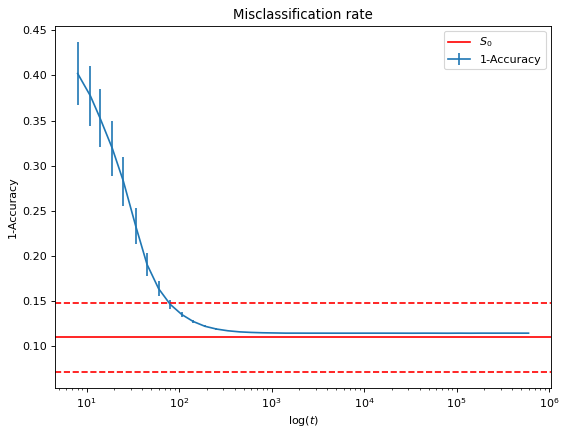

In [13]:
plt.figure(figsize=(8, 6), dpi=80)
plt.title("Misclassification rate")
#plt.errorbar(Time, MeanTestLoss, yerr = StdTestLoss, label = 'Test')
plt.errorbar(Time, 1-MeanTrainingAcc, yerr = StdTrainingAcc, label = '1-Accuracy')
plt.axhline(y=DistrPar[1], color='r', linestyle='-', label = r"$S_0$")
plt.axhline(y=(DistrPar[1] + DistrPar[2]), color='r', linestyle='--')
plt.axhline(y=(DistrPar[1] - DistrPar[2]), color='r', linestyle='--')
plt.xlabel(r'$\log(t)$')
plt.ylabel("1-Accuracy")
plt.legend()
plt.xscale('log')
plt.savefig('loss.pdf')
plt.show()